In [101]:
import os
import glob
from tqdm import tqdm
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torchvision import transforms

In [102]:
from dataloader.amosloader import AMOSDataset, AMOSDataset3D
from guided_diffusion.upsample import Upsample
from guided_diffusion.downsample import Downsample

In [139]:
def imshow(img: torch.Tensor):
    img = img[0].permute(1, 2, 0).cpu().detach().numpy() 

    print(img.shape)
    # 이미지를 시각화합니다.
    plt.imshow(img)
    plt.axis('off')  # 축 제거
    plt.show()

In [177]:
class SmoothingEncoder(nn.Module):
    def __init__(self,
                 in_channels,
                 model_channels,
                 image_size,
                 device,
                 dims=3) -> None:
        super().__init__()
        
        self.in_channels = in_channels
        self.model_channels = model_channels
        self.image_size = image_size
        self.device = device
        
        self.input_layer = nn.Sequential(
            nn.Linear(image_size, model_channels * 4),
            nn.SiLU(),
        )
        
        self.upsample = Upsample(3, False, dims, out_channels=dims)
        
    def forward(self, x):
        x = x.to(self.device)
        x = self.input_layer(x)
        x = self.upsample(x)
        return x

In [178]:
data_dir = "dataset/_AMOS"
image_size = 256
in_channels = 3
model_channels = 128
batch_size = 1

In [179]:
tran_list = [transforms.Resize((image_size, image_size)), transforms.ToTensor(),]
transform_test = transforms.Compose(tran_list)

dataset = AMOSDataset(data_dir, transform_test, phase="Tr")
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=False)

device = torch.device("cuda:0")

In [180]:
model = SmoothingEncoder(
    in_channels=in_channels,
    model_channels=model_channels,
    image_size=image_size,
    device=device
)

In [181]:
model = model.to(device)

  0%|          | 0/35524 [00:00<?, ?it/s]

(256, 256, 3)


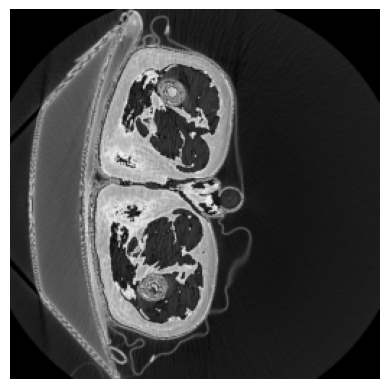

  0%|          | 0/35524 [00:00<?, ?it/s]


IndexError: tuple index out of range

In [182]:
for img, mask, path in tqdm(dataloader):
    # print(img.shape)
    # print(mask.shape)
    imshow(img)
    output = model(img)
    print(output.shape)
    # imshow(output)
    break